In [72]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

In [77]:
NUM_TRIALS = 2000
BANDIT_PROBS = [0.2, 0.4, 0.3, 0.1]

In [78]:
class Bandit:
  def __init__(self, enum, win_rate):
    self.enum = enum
    self.a = 1
    self.b = 1
    self.win_rate = win_rate
    self.number_of_samples = 0

  def pull(self):
    # sample from the beta distribution
    return np.random.random() < self.win_rate

  def sample(self):
    return np.random.beta(self.a, self.b)

  def update(self, new_sample):
    self.a += new_sample
    self.b += 1 - new_sample
    self.number_of_samples += 1

In [81]:
def thompson_sampling_experiment():
  bandits = [Bandit(idx, p) for idx, p in enumerate(BANDIT_PROBS)]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
      # use thompson sampling method to select the next bandit
      j = np.argmax([bandit.sample() for bandit in bandits])

      # pull the arm for the bandit with the largest sample
      x = bandits[j].pull()
      # update rewards log
      rewards[i] = x
      # update the distribution for the bandit whose arm we just pulled
      bandits[j].update(x)

  # plot the results
  legend = []
  for bandit in bandits:
    x = np.linspace(0, 1, NUM_TRIALS)
    plt.plot(x, beta.pdf(x, bandit.a, bandit.b))
    legend.append(f"p: {bandit.win_rate}, wr: {bandit.a - 1} / {(bandit.number_of_samples)}")
  plt.legend(legend)
  plt.title(f"The bandit distributions after {NUM_TRIALS} trials.")


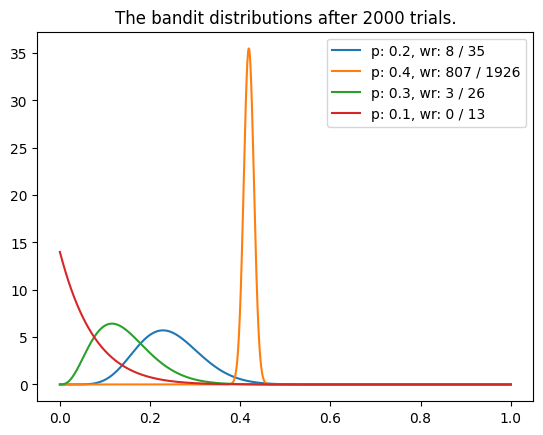

In [82]:
if __name__ == "__main__":
  thompson_sampling_experiment()